In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [2]:
Mart_data = pd.read_csv('/content/Train.csv')

In [3]:
Mart_data = pd.read_csv('/content/Test.csv')

In [4]:
Mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [5]:
Mart_data.shape

(5681, 11)

In [6]:
Mart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [7]:
Mart_data.isnull().sum()

,0
Item_Identifier,0
Item_Weight,976
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,1606
Outlet_Location_Type,0


In [8]:
Mart_data['Item_Weight'].mean()

np.float64(12.695633368756642)

In [9]:
Mart_data['Item_Weight'].fillna(Mart_data['Item_Weight'].mean(), inplace=True)

/tmp/ipython-input-9-180323154.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Mart_data['Item_Weight'].fillna(Mart_data['Item_Weight'].mean(), inplace=True)


In [10]:
Mart_data.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,1606
Outlet_Location_Type,0


In [11]:
mode_of_outlet_size = Mart_data.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))

In [12]:
print(mode_of_outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [13]:
missing_values = Mart_data['Outlet_Size'].isnull()

In [14]:
print(missing_values)

0       False
1        True
2        True
3        True
4       False
        ...  
5676    False
5677    False
5678     True
5679     True
5680     True
Name: Outlet_Size, Length: 5681, dtype: bool


In [15]:
Mart_data.loc[missing_values, 'Outlet_size'] = Mart_data.loc[missing_values, 'Outlet_Type'].apply(lambda x: mode_of_outlet_size)

In [16]:
Mart_data.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,1606
Outlet_Location_Type,0


In [17]:
Mart_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,5681.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.245189,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,9.195000,0.027047,94.412000,1987.000000
50%,12.695633,0.054154,141.415400,1999.000000
75%,15.850000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [18]:
sns.set()

<Figure size 600x600 with 0 Axes>

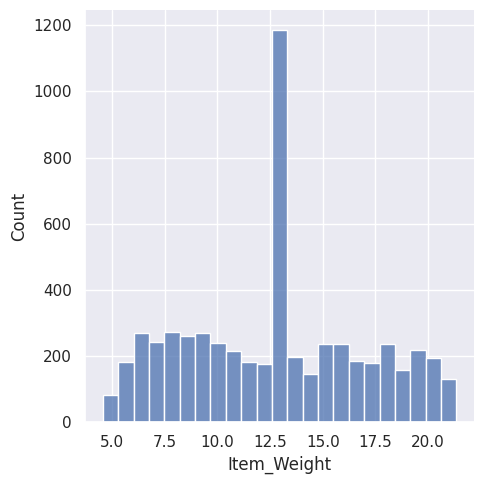

In [20]:
plt.figure(figsize=(6,6))
sns.displot(Mart_data['Item_Weight'])
plt.show()

<Figure size 600x600 with 0 Axes>

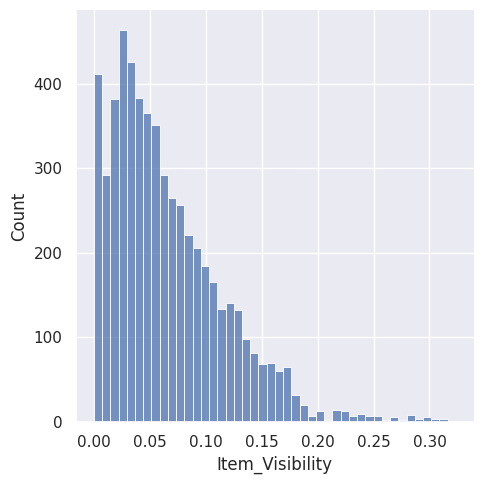

In [21]:
plt.figure(figsize=(6,6))
sns.displot(Mart_data['Item_Visibility'])
plt.show()

<Figure size 600x600 with 0 Axes>

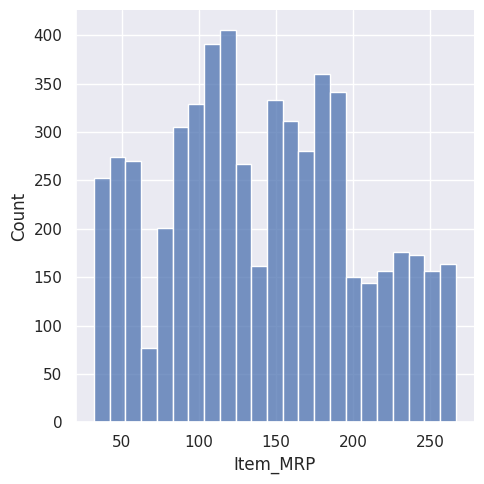

In [22]:
plt.figure(figsize=(6,6))
sns.displot(Mart_data['Item_MRP'])
plt.show()

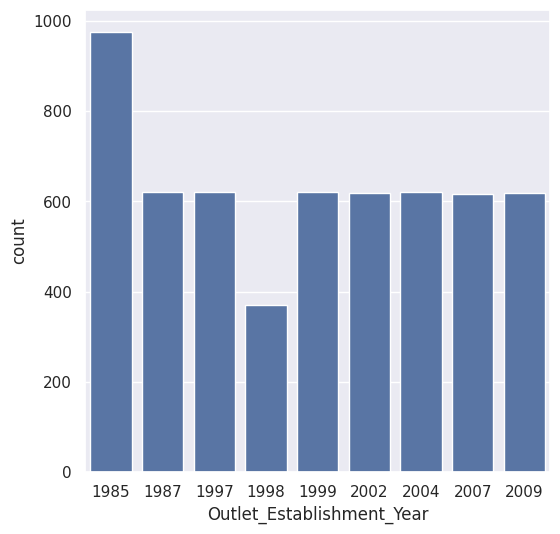

In [23]:
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year', data = Mart_data)
plt.show()

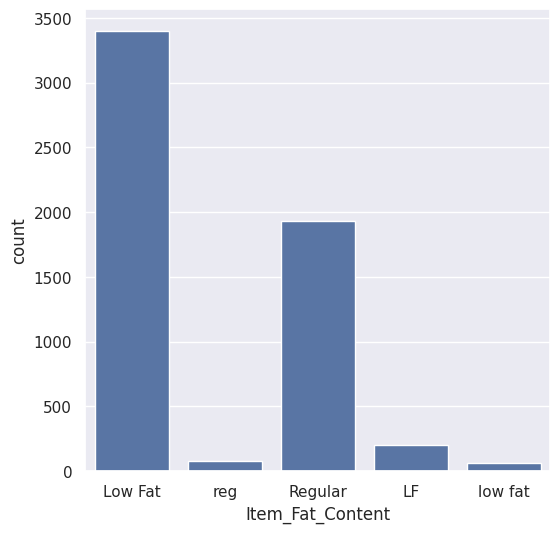

In [25]:
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content', data = Mart_data)
plt.show()

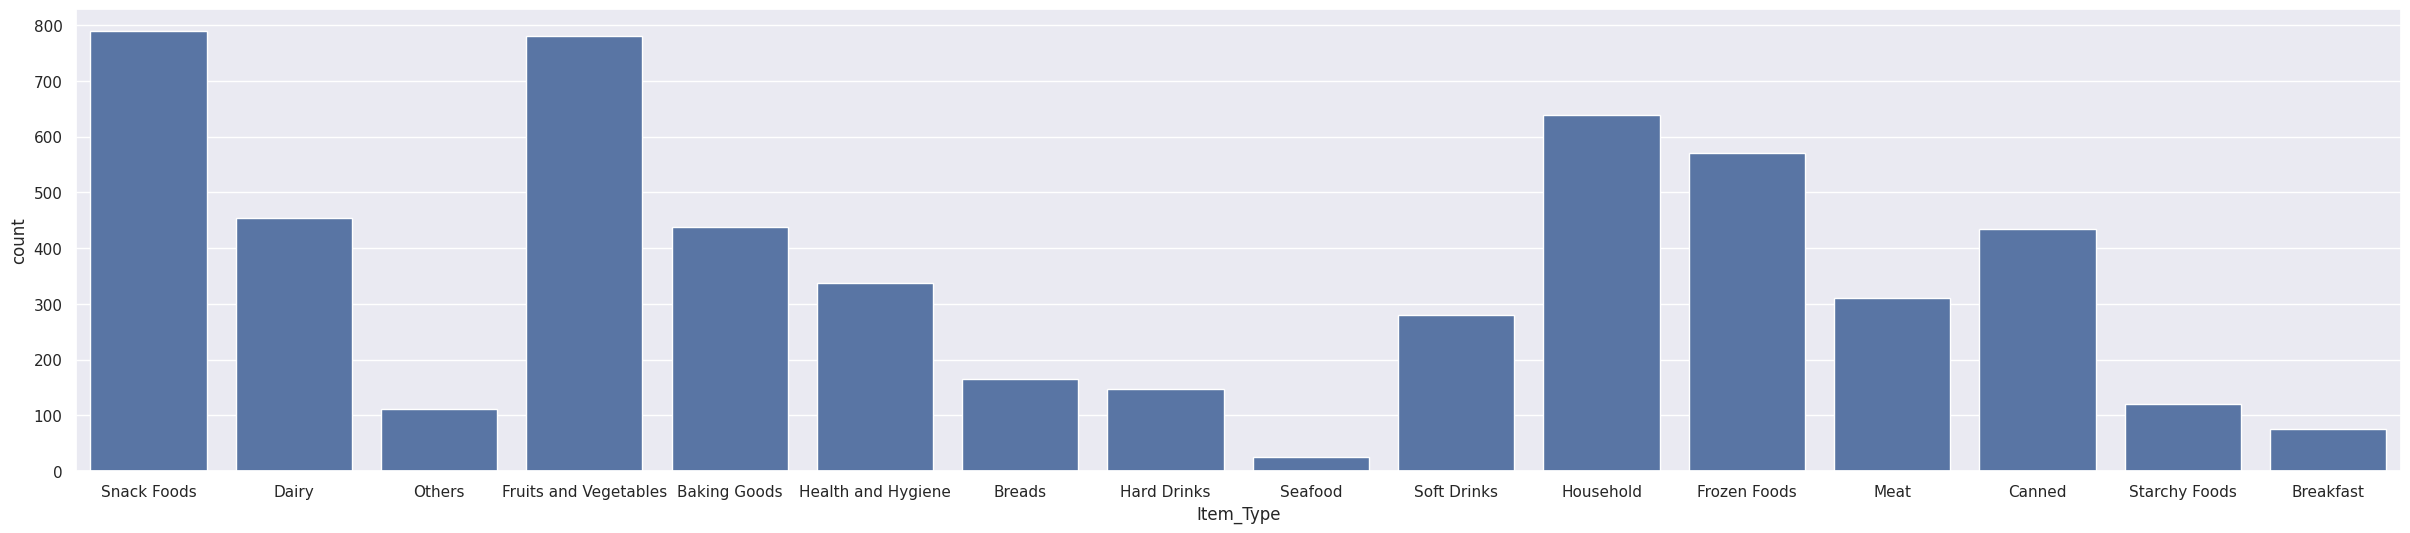

In [26]:
plt.figure(figsize=(30,6))
sns.countplot(x='Item_Type', data = Mart_data)
plt.show()

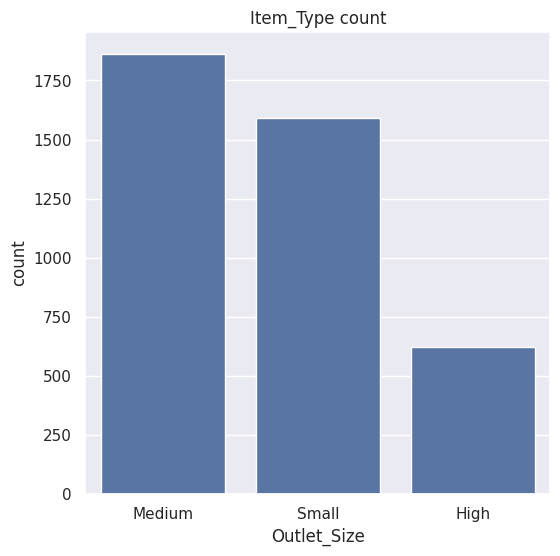

In [27]:
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Size', data = Mart_data)
plt.title('Item_Type count')
plt.show()

In [28]:
Mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_size
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,NaN
1,FDW14,8.300000,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,Outlet_Type Grocery Store Supermarket Type1 Su...
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store,Outlet_Type Grocery Store Supermarket Type1 Su...
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1,Outlet_Type Grocery Store Supermarket Type1 Su...
4,FDY38,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN


In [29]:
Mart_data['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,3396
Regular,1935
LF,206
reg,78
low fat,66


In [32]:
Mart_data.replace({'Item_Fat_content': {'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}}, inplace = True)

In [33]:
Mart_data['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,3396
Regular,1935
LF,206
reg,78
low fat,66


In [34]:
encoder = LabelEncoder()

In [36]:
Mart_data['Item_Identifier'] = encoder.fit_transform(Mart_data['Item_Identifier'])
Mart_data['Item_Fat_Content'] = encoder.fit_transform(Mart_data['Item_Fat_Content'])
Mart_data['Item_Type'] = encoder.fit_transform(Mart_data['Item_Type'])
Mart_data['Outlet_Identifier'] = encoder.fit_transform(Mart_data['Outlet_Identifier'])
Mart_data['Outlet_Size'] = encoder.fit_transform(Mart_data['Outlet_Size'])
Mart_data['Outlet_Location_Type'] = encoder.fit_transform(Mart_data['Outlet_Location_Type'])
Mart_data['Outlet_Type'] = encoder.fit_transform(Mart_data['Outlet_Type'])


In [37]:
Mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_size
0,1103,20.750000,1,0.007565,13,107.8622,9,1999,1,0,1,NaN
1,1067,8.300000,4,0.038428,4,87.3198,2,2007,3,1,1,Outlet_Type Grocery Store Supermarket Type1 Su...
2,1406,14.600000,1,0.099575,11,241.7538,0,1998,3,2,0,Outlet_Type Grocery Store Supermarket Type1 Su...
3,809,7.315000,1,0.015388,13,155.0340,2,2007,3,1,1,Outlet_Type Grocery Store Supermarket Type1 Su...
4,1184,12.695633,2,0.118599,4,234.2300,5,1985,1,2,3,NaN


In [56]:
X = Mart_data.drop(columns='Outlet_Establishment_Year', axis=1)
Y = Mart_data['Outlet_Establishment_Year']

In [57]:
print(X)

      Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                1103    20.750000                 1         0.007565   
1                1067     8.300000                 4         0.038428   
2                1406    14.600000                 1         0.099575   
3                 809     7.315000                 1         0.015388   
4                1184    12.695633                 2         0.118599   
...               ...          ...               ...              ...   
5676              231    10.500000                 2         0.013496   
5677              306     7.600000                 2         0.142991   
5678             1412    10.000000                 1         0.073529   
5679              517    15.300000                 2         0.000000   
5680              987     9.500000                 2         0.104720   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Size  \
0            13  107.8622                  9            1   
1

In [58]:
print(Y)

0       1999
1       2007
2       1998
3       2007
4       1985
        ... 
5676    1997
5677    2009
5678    2002
5679    2007
5680    2002
Name: Outlet_Establishment_Year, Length: 5681, dtype: int64


In [59]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [60]:
print(X.shape, X_train.shape, X_test.shape)

(5681, 11) (4544, 11) (1137, 11)


In [61]:
regressor = XGBRegressor()

In [62]:
regressor.fit(X_train, Y_train)

ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, the experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:Outlet_size: object

In [ ]:
 training_data_prediction = regressor.predict(X_train)

In [ ]:
r2_train = metrics.r2_score(Y_train, training_data_prediction)

In [ ]:
print('R Squared value =', r2_train )

In [ ]:
test_data_prediction = regressor.predict(X_test)

In [ ]:
r2_test = metrics.r2_score(Y_train, training_data_prediction)

In [ ]:
print('R Squared value =' r2_test)